In [3]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import chardet

#open data , 영화리뷰데이터 
with open("imdb_master.csv", 'rb') as f:
    result = chardet.detect(f.read()) 

train = pd.read_csv("imdb_master.csv", encoding=result['encoding'])
train.head()


,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [5]:
train = train.drop(train.columns[[0, 1, 4]], axis=1) 

In [6]:
train.label = [(l!='neg')*1 for l in train.label]

In [7]:
train.head() 

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [9]:
d = train 
d.columns = ['user_review' , 'positive']
d.head() 

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [10]:
# 트레이닝셋과 테스트셋으로 나눈다. 
split = 0.7
d_train = d[:int(split*len(d))]
d_test = d[int((1-split)*len(d)):]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
features = vectorizer.fit_transform(d_train.user_review)
features

<70000x121229 sparse matrix of type '<class 'numpy.int64'>'
	with 9598445 stored elements in Compressed Sparse Row format>

In [12]:
len(vectorizer.get_feature_names()) , vectorizer.get_feature_names()

(121229,
 ['00',
  '000',
  '0000',
  '00000000000',
  '0000000000001',
  '000000003',
  '00000001',
  '00001',
  '0001',
  '00015',
  '000dm',
  '000s',
  '000â',
  '001',
  '002',
  '003',
  '003830',
  '004',
  '005',
  '006',
  '0069',
  '007',
  '0079',
  '007s',
  '007â',
  '008',
  '0080',
  '0083',
  '009',
  '0091042',
  '0093638',
  '00am',
  '00o',
  '00pm',
  '00s',
  '00schneider',
  '01',
  '0126',
  '0148',
  '019',
  '01pm',
  '02',
  '020410',
  '022',
  '0230',
  '0267',
  '029',
  '03',
  '0312',
  '039',
  '04',
  '041',
  '044',
  '05',
  '050',
  '05nomactr',
  '06',
  '0615',
  '06th',
  '07',
  '07am',
  '07b',
  '08',
  '087',
  '089',
  '08th',
  '09',
  '0and',
  '0f',
  '0ne',
  '0r',
  '0s',
  '0tt',
  '10',
  '100',
  '1000',
  '10000',
  '100000',
  '1000000',
  '10000000000',
  '10000000000000',
  '10000th',
  '1000lb',
  '1000s',
  '1000th',
  '1000x',
  '1001',
  '1003',
  '1004',
  '100b',
  '100bt',
  '100ft',
  '100ibs',
  '100k',
  '100m',
  '100mi

In [21]:
i = 30000
j = 100
words = vectorizer.get_feature_names()[i:i+30]
pd.DataFrame(features[j:j+10,i:i+30].todense(), columns=words)

,dimanche,dimartino,dimas,dimbleby,dimbulb,dime,dimeco,dimension,dimensional,dimensionality,...,diminution,diminutive,dimitri,dimitriades,dimitrij,dimitrios,dimitrius,dimitrova,dimitru,dimitry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
words

['dimanche',
 'dimartino',
 'dimas',
 'dimbleby',
 'dimbulb',
 'dime',
 'dimeco',
 'dimension',
 'dimensional',
 'dimensionality',
 'dimensionally',
 'dimensionless',
 'dimensions',
 'dimentional',
 'dimes',
 'dimestore',
 'diminish',
 'diminished',
 'diminishes',
 'diminishing',
 'diminution',
 'diminutive',
 'dimitri',
 'dimitriades',
 'dimitrij',
 'dimitrios',
 'dimitrius',
 'dimitrova',
 'dimitru',
 'dimitry',
 'dimly',
 'dimmed',
 'dimmer',
 'dimmest',
 'dimmick',
 'dimming',
 'dimmock',
 'dimmsdale',
 'dimness',
 'dimple',
 'dimpled',
 'dimples',
 'dimply',
 'dims',
 'dimsdale',
 'dimtri',
 'dimwit',
 'dimwited',
 'dimwits',
 'dimwitted',
 'din',
 'dina',
 'dinaggio',
 'dinaggioi',
 'dinah',
 'dinahs',
 'dinamite',
 'dinamo',
 'dinasours',
 'dinasty',
 'dincht',
 'dind',
 'dindal',
 'dindo',
 'dine',
 'dined',
 'dinehart',
 'dinelli',
 'diner',
 'dinero',
 'diners',
 'dinerâ',
 'dines',
 'dinesen',
 'ding',
 'dingaling',
 'dingbat',
 'dingbats',
 'dinged',
 'dinghy',
 'dingiest',

In [15]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, d_train.positive)

pred1 = model1.predict_proba(vectorizer.transform(d_test.user_review))
pred1 , pred1.shape

(array([[1.00000000e+00, 1.89777939e-11],
        [9.99999967e-01, 3.29460894e-08],
        [9.99885531e-01, 1.14468753e-04],
        ...,
        [1.00000000e+00, 4.71360351e-10],
        [7.08223976e-01, 2.91776024e-01],
        [1.44847203e-12, 1.00000000e+00]]), (70000, 2))

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth="3")
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("Acc: %0.2f" % acc, (0.1,0.8), size=14)
        annotate("AUC: %0.2f" % auc, (0.1,0.7), size=14)

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family ['Gulim'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


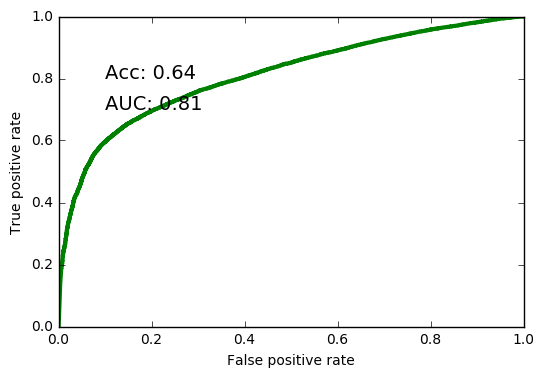

In [17]:
performance(d_test.positive, pred1)